In [376]:
import numpy as np
import matplotlib.pyplot as plt

In [380]:
def read_data(data):
    """Read the data from the file."""
    return np.loadtxt(data)

In [386]:
name = "L14_J1.00_q8"
# folder = f"results/{name}/"
folder = f"results/good_results/{name}/"

file = f"{folder}{name}.txt"

q=int(name[-1])
print(q)

8


In [387]:
lng = read_data(file)

In [388]:
lng = lng[lng[:, 1] > 1]

In [389]:
# save this data as a file txt with two columns
savename = f"{folder}{name}_no0.txt"
np.savetxt(savename, lng, fmt='%d %d')

In [390]:
beta_c = np.log(1 + np.sqrt(q))
print(beta_c)

1.342454046453526


Text(0, 0.5, 'log($\\Omega$(E))')

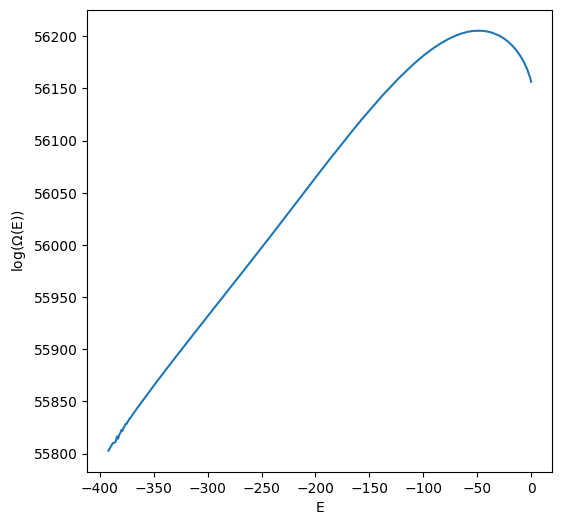

In [391]:
plt.figure(figsize=(6, 6))
plt.plot(lng[:, 0], lng[:, 1])
plt.xlabel('E')
plt.ylabel(r'log($\Omega$(E))')


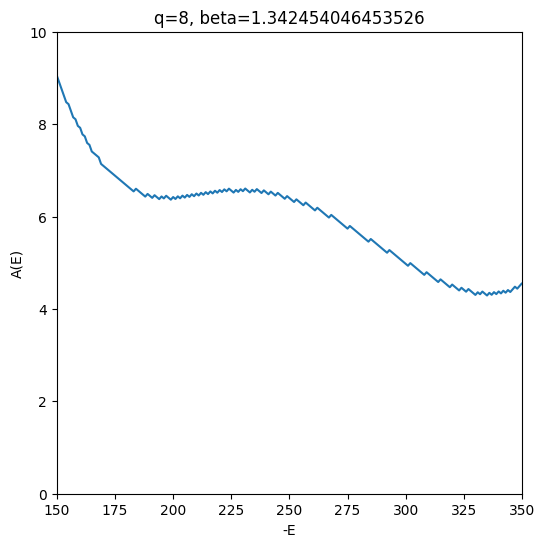

In [397]:

# Example inputs
ln_omega_E = lng[:, 1]
E_levels = lng[:, 0]  # Energy levels
beta_j = beta_c
# Compute log(Boltzmann weights)
ln_boltzmann_weights = ln_omega_E - beta_j * E_levels

# Use log-sum-exp trick to calculate ln(Z)
max_ln_weight = np.max(ln_boltzmann_weights)
ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

# Compute log(P(E)) and then P(E)
ln_P_E = ln_boltzmann_weights - ln_Z
P_E = np.exp(ln_P_E)  # Back to normal space if needed

# plot in the range -E [150, 350]
plt.figure(figsize=(6, 6))
plt.plot(-E_levels, -ln_P_E)
plt.xlabel('-E')
plt.xlim(150, 350)
plt.ylim(0, 10)
plt.ylabel('A(E)')
plt.title(f'q={q}, beta={beta_j}')
plt.show()



In [ ]:
from ipywidgets import interact, FloatSlider

# Example inputs
E_levels = lng[:, 0]  # Energy levels
ln_omega_E = lng[:, 1]  # Example log degeneracy
beta_c = np.log(1 + np.sqrt(q))

def update_plot(beta):
    # Compute log(Boltzmann weights)
    # ln_boltzmann_weights = ln_omega_E - beta * E_levels
    
    # Use log-sum-exp trick to calculate ln(Z)
    # max_ln_weight = np.max(ln_boltzmann_weights)
    # ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))
    
    # # Compute log(P(E)) and then P(E)
    # ln_P_E = ln_boltzmann_weights - ln_Z
    # P_E = np.exp(ln_P_E)  # Back to normal space
    A = -ln_omega_E + beta * E_levels
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(-E_levels, A, label=f'beta={beta}')
    plt.xlabel('E')
    plt.ylabel('A(E)')
    plt.title('A(E)')

    plt.legend()
    plt.grid()
    plt.show()

# Interactive slider
interact(update_plot, beta=FloatSlider(value=beta_c, min=0, max=4, step=0.0001))


interactive(children=(FloatSlider(value=1.342454046453526, description='beta', max=4.0, step=0.0001), Output()…

<function __main__.update_plot(beta)>

In [373]:
def compute_P(beta, lng):
    ln_omega_E = lng[:, 1]
    E_levels = lng[:, 0]  # Energy levels
    beta = beta

    # Compute log(Boltzmann weights)
    ln_boltzmann_weights = ln_omega_E - beta * E_levels

    # Use log-sum-exp trick to calculate ln(Z)
    max_ln_weight = np.max(ln_boltzmann_weights)
    ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

    # Compute log(P(E)) and then P(E)
    ln_P_E = ln_boltzmann_weights - ln_Z
    P_E = np.exp(ln_P_E)  # Back to normal space if needed

    return E_levels, P_E


1.332454046453526 1.342454046453526 1.352454046453526


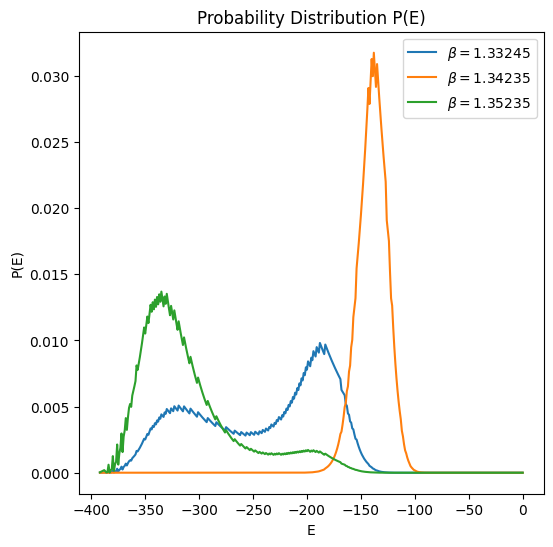

In [374]:
E, P_b1 = compute_P(beta_c-0.02, lng)
E, P_b2 = compute_P(beta_c-0.2, lng)
E, P_b3 = compute_P(beta_c, lng)

print(beta_c-0.01, beta_c, beta_c+0.01)
plt.figure(figsize=(6, 6))
plt.plot(E, P_b1, label=r'$\beta=1.33245$')
plt.plot(E, P_b2, label=r'$\beta=1.34235$')
plt.plot(E, P_b3, label=r'$\beta=1.35235$')
plt.legend()
plt.xlabel('E')
plt.ylabel('P(E)')
plt.title('Probability Distribution P(E)')
plt.show()

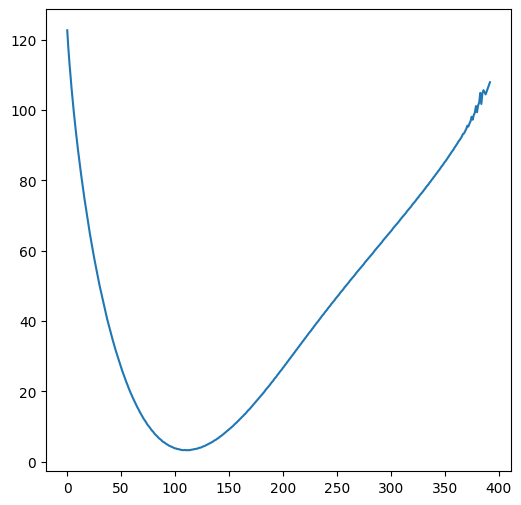

In [375]:
E, P = compute_P(beta_j, lng)
A = -np.log(P)

plt.figure(figsize=(6, 6))
plt.plot(-E, A)
plt.show()